## Exploratory Analysis
To begin this exploratory analysis, first import libraries and define functions for plotting the data using `matplotlib`.

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


The next hidden code cells define functions for plotting data. Click on the "Code" button in the published kernel to reveal the hidden code.

In [2]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) // nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


In [3]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [4]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


Now we are ready to read in the data and use the plotting functions to visualize the data.

In [5]:
nRowsRead = 1000 # specify 'None' if want to read whole file
df1 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'pd_speech_features.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 195 rows and 24 columns


Let's take a quick look at what the data looks like:

In [6]:
df1.head(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


Distribution graphs (histogram/bar graph) of sampled columns:

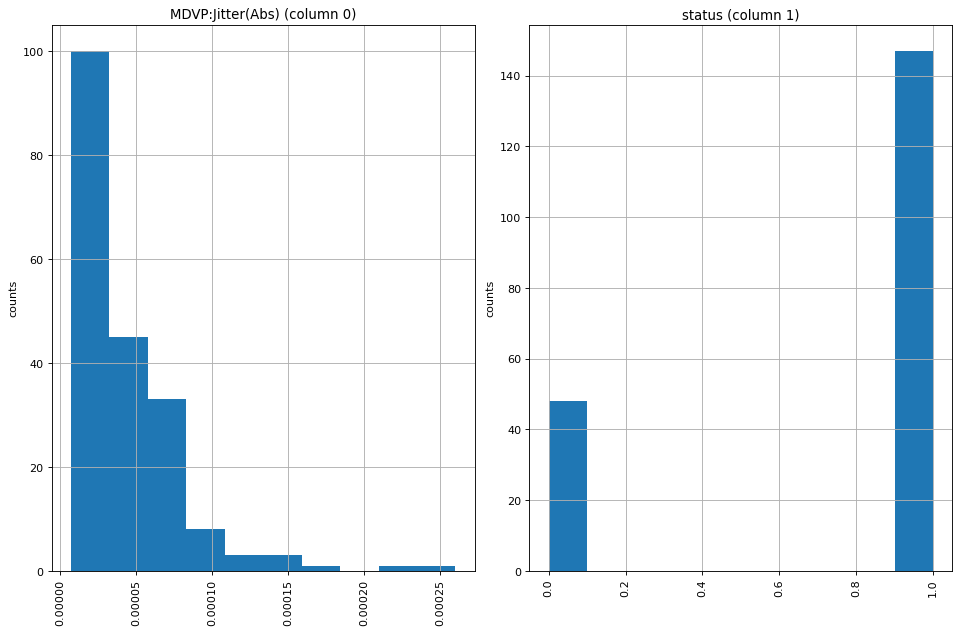

In [7]:
plotPerColumnDistribution(df1, 10, 5)

Correlation matrix:

In [8]:
plotCorrelationMatrix(df1, 188)

C:\Users\mailt\AppData\Local\Temp\ipykernel_13636\128494285.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN


Scatter and density plots:

C:\Users\mailt\AppData\Local\Temp\ipykernel_13636\950191735.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


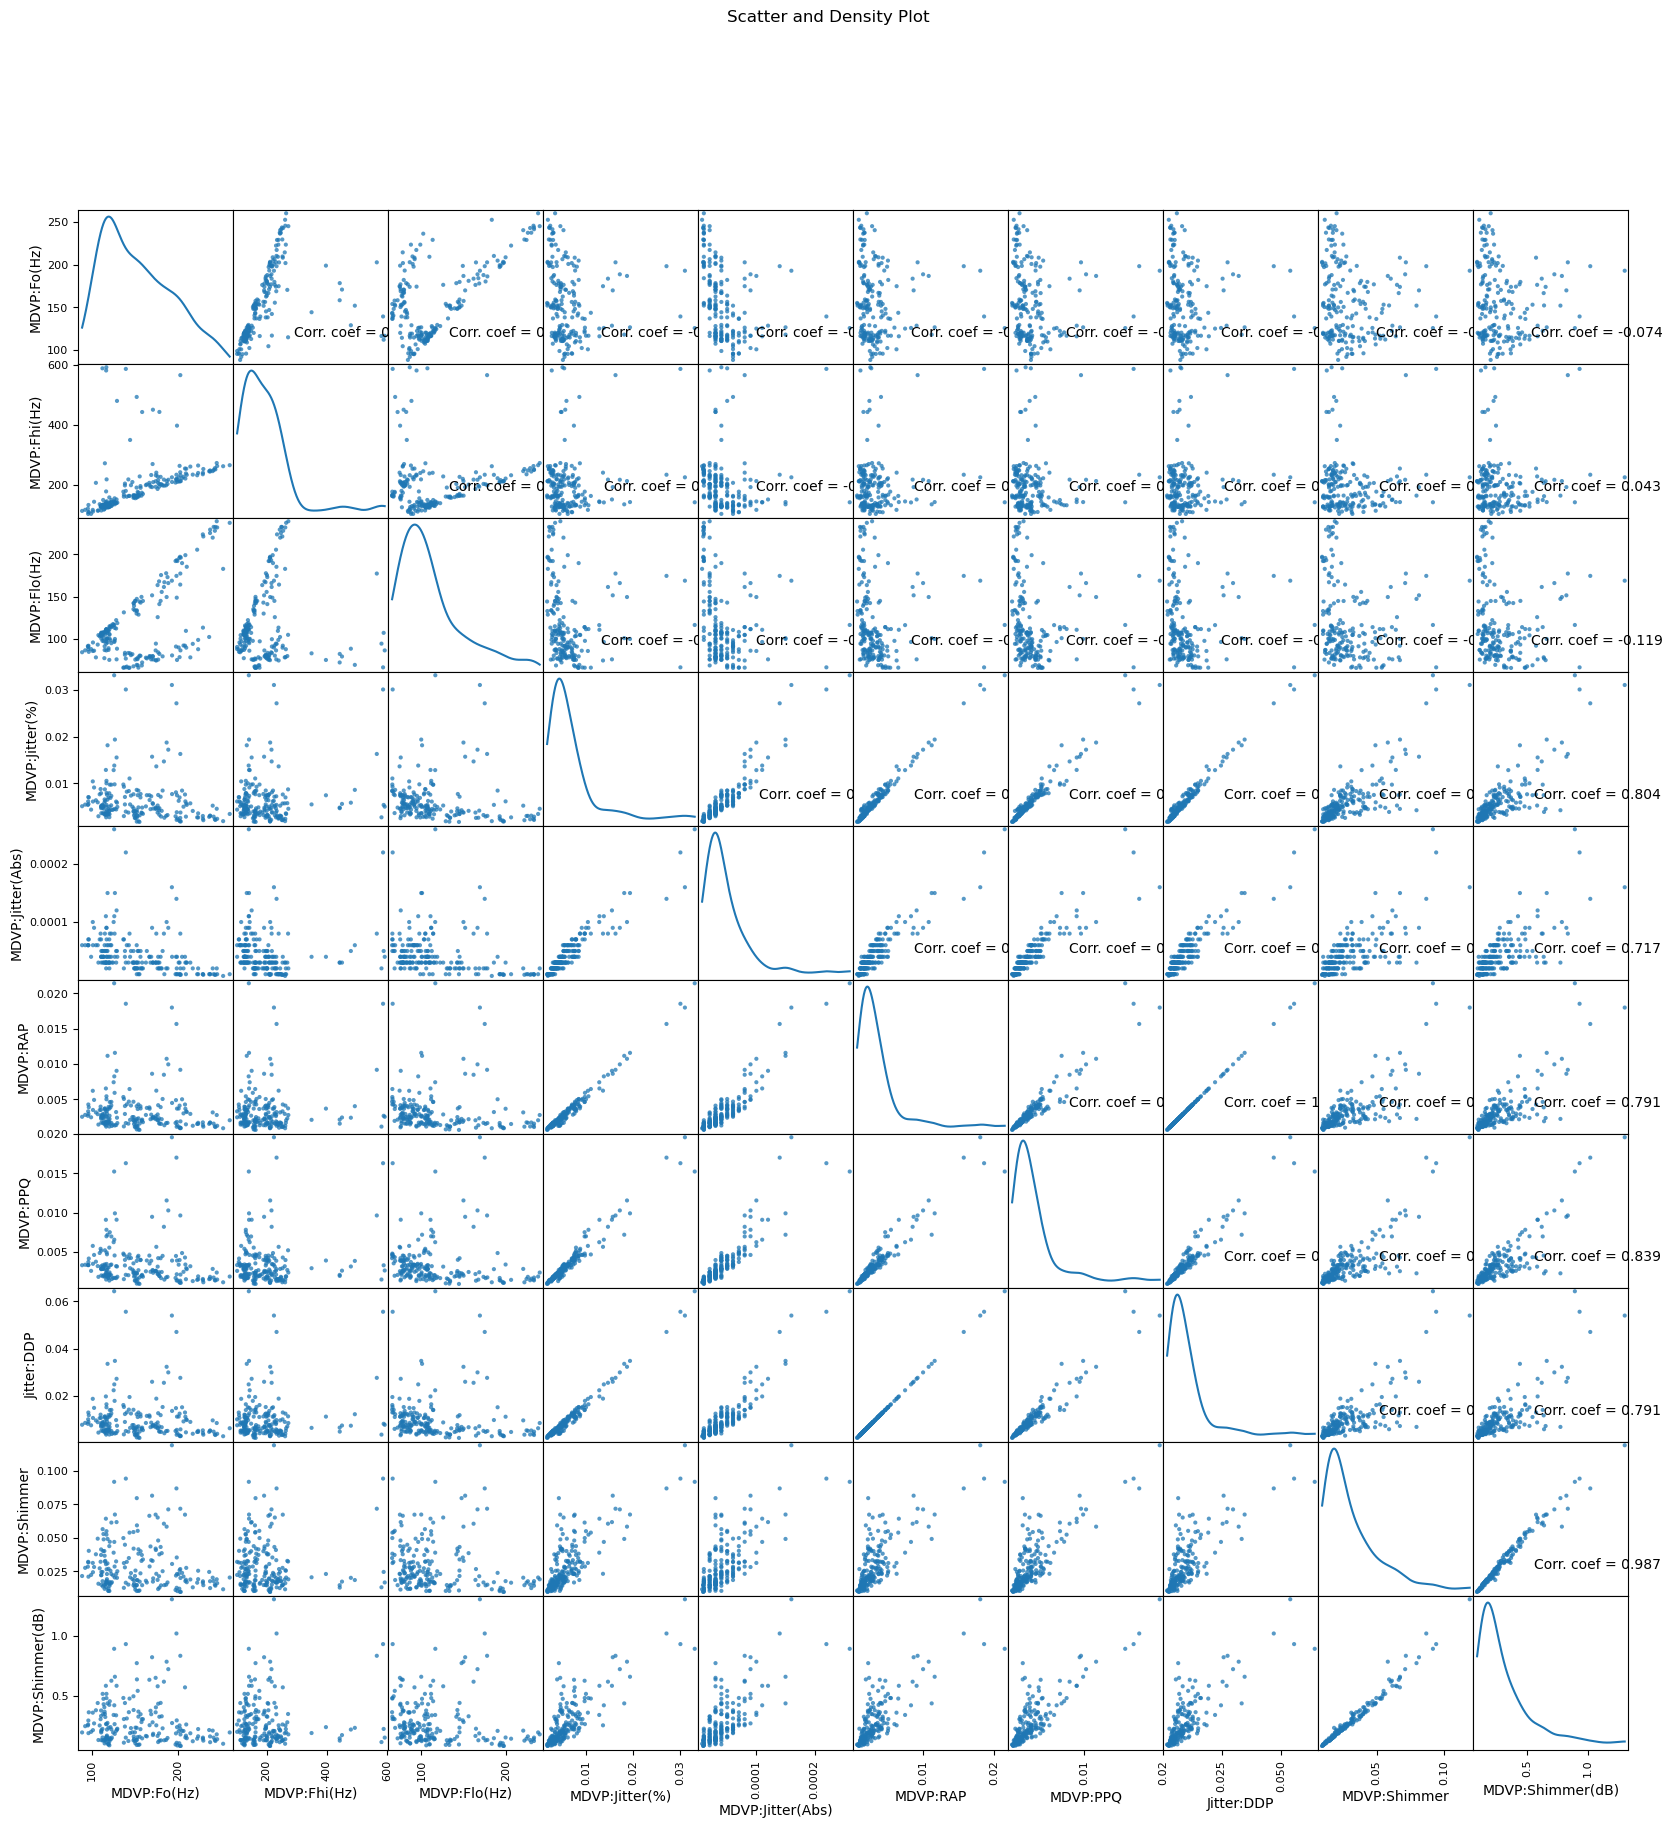

In [9]:
plotScatterMatrix(df1, 20, 10)

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [11]:
df1.iloc[0:10,-1]

0    0.284654
1    0.368674
2    0.332634
3    0.368975
4    0.410335
5    0.357775
6    0.211756
7    0.163755
8    0.231571
9    0.271362
Name: PPE, dtype: float64

In [12]:
df1.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [15]:
df1['status'].head()

0    1
1    1
2    1
3    1
4    1
Name: status, dtype: int64

# Features and Label

In [89]:
X=df1
X=X.drop(['status','name'],axis=1)
y=df1['status']

In [90]:
X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [91]:
X.iloc[:,2:].head()

,MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


**Normalize the Input features X** 

In [92]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X.iloc[:,2:]=scaler.fit_transform(X.iloc[:,2:])

In [93]:
X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,0.054815,0.195680,0.249012,0.145472,0.247588,0.145288,0.312215,0.280197,...,0.172448,0.332584,0.068307,0.511745,0.369155,0.960148,0.569875,0.585765,0.390661,0.497310
1,122.400,148.650,0.278323,0.254130,0.288538,0.191233,0.323687,0.191042,0.472887,0.444536,...,0.279424,0.516048,0.059331,0.432577,0.470830,0.977024,0.703277,0.741337,0.473145,0.671326
2,116.682,131.111,0.265288,0.280178,0.328063,0.229287,0.369239,0.229411,0.390634,0.326212,...,0.219848,0.443317,0.039596,0.496220,0.404416,1.000000,0.636745,0.686371,0.408819,0.596682
3,116.676,137.871,0.264200,0.263342,0.328063,0.209056,0.324759,0.208862,0.414278,0.354971,...,0.233785,0.475478,0.040997,0.495936,0.416255,0.975885,0.695627,0.738089,0.436977,0.671949
4,116.014,141.781,0.260107,0.354511,0.407115,0.282755,0.437299,0.282870,0.499452,0.410025,...,0.286852,0.584542,0.054174,0.455499,0.375159,0.992813,0.762472,0.513798,0.404336,0.757611


# Feature Importance and Selection

Chi-Square Test for Feature Selection:
A chi-square test is used in statistics to test the independence of two events. Given the data of two variables, we can get observed count O and expected count E.
In feature selection, we aim to select the features which are highly dependent on the response.

In [94]:
from sklearn.feature_selection import SelectKBest,chi2
bestfeatures = SelectKBest(score_func=chi2, k=7)
fit = bestfeatures.fit(X,y)

In [95]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [99]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  
print(featureScores.nlargest(5,'Score'))

         Feature       Score
0    MDVP:Fo(Hz)  316.985398
1   MDVP:Fhi(Hz)  227.402656
2   MDVP:Flo(Hz)    6.014075
18       spread1    5.832052
21           PPE    5.680013


In [112]:
selected_features=featureScores.nlargest(5,'Score')['Feature']

In [113]:
X[selected_features].head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),spread1,PPE
0,119.992,157.302,0.054815,0.569875,0.497310
1,122.400,148.650,0.278323,0.703277,0.671326
2,116.682,131.111,0.265288,0.636745,0.596682
3,116.676,137.871,0.264200,0.695627,0.671949
4,116.014,141.781,0.260107,0.762472,0.757611


# Correlation

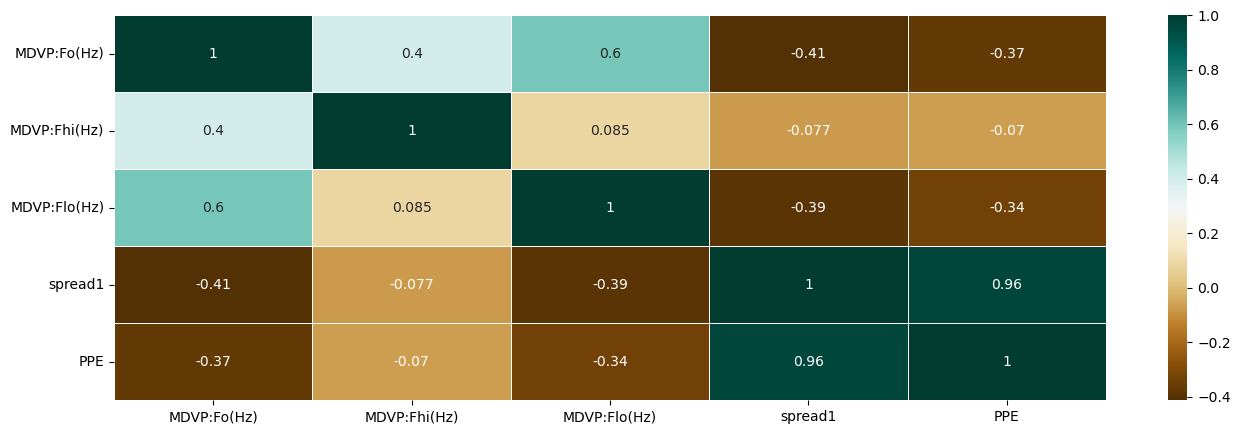

In [114]:
import seaborn as sb
plt.figure(figsize = (16,5))

#ax = sb.heatmap(df1.iloc[:, 1:6:], annot=True, linewidths=.5)
corr = X[selected_features].corr()
ax= sb.heatmap(corr, cmap="BrBG",annot=True, linewidths=.5)

# Train Test Split

In [115]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.33, random_state=42)

# Logistic Regression

In [116]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

clf1 = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred1=clf1.predict(X_test)

accuracy_score(y_test, y_pred1)

0.8769230769230769

# SGD (Linear) Classifier

In [117]:
from sklearn.linear_model import SGDClassifier

clf2 = SGDClassifier(loss="hinge", penalty="l2").fit(X_train, y_train)

y_pred2=clf2.predict(X_test)

accuracy_score(y_test, y_pred2)

0.3230769230769231

# K Nearest Neighbors Classifier

In [118]:
from sklearn.neighbors import KNeighborsClassifier

clf3 = KNeighborsClassifier(n_neighbors=7).fit(X_train, y_train)

y_pred3=clf3.predict(X_test)

accuracy_score(y_test, y_pred3)

c:\Users\mailt\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8461538461538461

# Decision Tree Classifier

In [119]:
from sklearn.tree import DecisionTreeClassifier

clf4 = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

y_pred4=clf4.predict(X_test)

accuracy_score(y_test, y_pred4)

0.8769230769230769

# Random Forest Classifier

In [120]:
from sklearn.ensemble import RandomForestClassifier

clf5 = RandomForestClassifier(max_depth=2, random_state=0).fit(X_train, y_train)

y_pred5=clf5.predict(X_test)

accuracy_score(y_test, y_pred5)

0.8615384615384616

# Support Vector Machine Classifier

In [121]:
from sklearn.svm import SVC

clf6 = SVC(gamma='auto').fit(X_train, y_train)

y_pred6=clf6.predict(X_test)

accuracy_score(y_test, y_pred6)

0.7384615384615385

# Models Comparison

In [122]:
from sklearn.metrics import f1_score,recall_score,precision_score

comp=pd.DataFrame({'Models':['Logistic Regression','SGD CLassifier', 
                             'K Nearest Neighbor','Decision Tree Regressor',
                             'Random Forest Regressor','Support Vector Machine'],
                   
                   'Accuracy ':[accuracy_score(y_test, y_pred1)*100,
                                accuracy_score(y_test, y_pred2)*100,
                               accuracy_score(y_test, y_pred3)*100,
                               accuracy_score(y_test, y_pred4)*100,
                               accuracy_score(y_test, y_pred5)*100,
                               accuracy_score(y_test, y_pred6)*100
                                 ],
                   'F1 Score':[f1_score(y_test, y_pred1),
                                 f1_score(y_test, y_pred2),
                                 f1_score(y_test, y_pred3),
                                 f1_score(y_test, y_pred4),
                                 f1_score(y_test, y_pred5),
                                 f1_score(y_test, y_pred6)
                                  ],
                  'Recall':[recall_score(y_test, y_pred1),
                                 recall_score(y_test, y_pred2),
                                 recall_score(y_test, y_pred3),
                                 recall_score(y_test, y_pred4),
                                 recall_score(y_test, y_pred5),
                                 recall_score(y_test, y_pred6)
                                  ],
                  'Precision':[precision_score(y_test, y_pred1),
                                 precision_score(y_test, y_pred2),
                                 precision_score(y_test, y_pred3),
                                 precision_score(y_test, y_pred4),
                                 precision_score(y_test, y_pred5),
                                 precision_score(y_test, y_pred6)
                                  ]} )

In [123]:
comp

,Models,Accuracy,F1 Score,Recall,Precision
0,Logistic Regression,87.692308,0.921569,0.979167,0.870370
1,SGD CLassifier,32.307692,0.185185,0.104167,0.833333
2,K Nearest Neighbor,84.615385,0.905660,1.000000,0.827586
3,Decision Tree Regressor,87.692308,0.916667,0.916667,0.916667
4,Random Forest Regressor,86.153846,0.910891,0.958333,0.867925
5,Support Vector Machine,73.846154,0.846847,0.979167,0.746032


From the model comparison we can say that Logistic Regression performs the best among all the models.
Recall=1 means only one class among the two classes is getting predicted (which is not good) so we don't consider those models